<a href="https://colab.research.google.com/github/kumarabhinavthakur274/Kumar_Abhinav_Rossmann_Sales_Prediction_Capstone_Project/blob/main/Kumar_Abhinav_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

**Importing some of the important libraries**

In [78]:
# ignore warnings
import warnings    
warnings.filterwarnings('ignore')

# Modules for dataframe and ndarrays and maths
import pandas as pd
import numpy as np
from datetime import datetime
import math

# visualisation packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})



# **Data Preparation**

In [79]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
# uploading relevent datasets 
df_sales = pd.read_csv("/content/drive/MyDrive/DriveHub/Rossmann Stores Data (1).csv")
df_stores = pd.read_csv("/content/drive/MyDrive/DriveHub/store.csv")

In [81]:
# lets check the data frames
print("Rossman sales dataset: \n")
df_sales.head()

Rossman sales dataset: 



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [82]:
print("Stores dataset: \n")
df_stores.head()

Stores dataset: 



,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [83]:
# checking for null values and the Dtype of the columns in sales dataset
df_sales.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


* Looks like there is no null value in sales data set.
* There are two columns that is Date and StateHoliday which is object other than that everthing is numerical data types.


In [84]:
# checking for null values and the Dtype of the columns in store dataset
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


 * There are missing values in stores dataset which need to be treated.
 * StoreType Assortment and PromoInterval are in object data types and rest others are numerical columns.






**Null Value Treatment**

In [85]:
df_stores.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are four columns which contains null values those are following:

**CompetitionDistance**- This is the distance from the nearest competitor store.We will check the distribution of the data according to which we will determine which among mean, median or mode will be suitable to replace the null value with.

**CompetitionOpenSinceMonth**- gives the month around which the nearest competitor store was opened, mode of the column would tell us the most occuring month.

**CompetitionOpenSinceYear**- gives the approximate year around which the nearest competitor store was opened, mode of the column would tell us the most occuring month

**Promo2SinceWeek, Promo2SinceYear** and **PromoInterval** are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

In [86]:
# replacing null values in Promo2SinceWeek, Promo2SinceYear and PromoInterval columns with vaue 0
promo_list = ['Promo2SinceWeek','Promo2SinceYear','PromoInterval']
for i in promo_list:
  df_stores[i].fillna(value=0,inplace=True)

In [87]:
# replacing null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear with mode
comp_list = ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']
for j in comp_list:
  df_stores[j].fillna(df_stores[i].mode()[0],inplace=True)

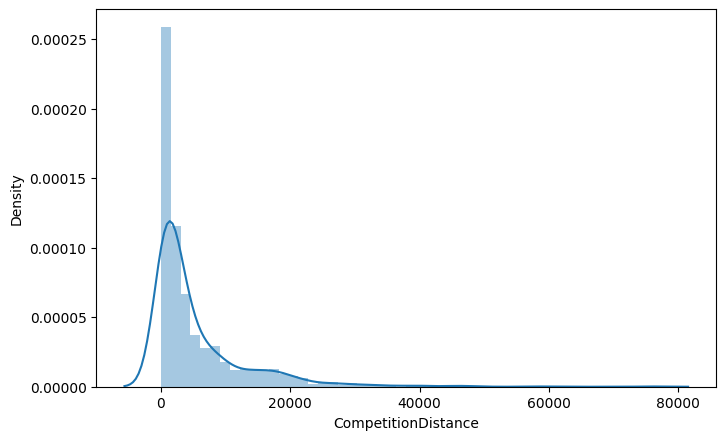

In [88]:
# checking the distribution of CompetitionDistance 
sns.distplot(df_stores["CompetitionDistance"])

Above distribution is right skewed that means median is the most appropriate central tendency to replace the null values with.

In [89]:
# replacing the null values in CompetitionDistance 
df_stores["CompetitionDistance"].fillna(df_stores["CompetitionDistance"].median(),inplace=True)

In [90]:
# lets check the null values again to see the changes we made
df_stores.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Let us merge both the tables 

In [91]:
# doing left join for merging the sales dataset and store dataset
df_merged = pd.merge(df_sales,df_stores,how="left",on="Store")

In [92]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [93]:
df_merged.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [94]:
# checking the columns in new merged dataframe
print(df_merged.columns) 

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [95]:
# creating the list of categorical variables in our dataset which may proved to be useful for us
categorical_variable_list = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType',
                             'Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2',
                             'Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [96]:
# checking for unique values in categorical variables
for i in categorical_variable_list:
  print(f'Unique vaue in {i} column is {df_merged[i].unique()} ')
  print("\n")


Unique vaue in DayOfWeek column is [5 4 3 2 1 7 6] 


Unique vaue in Open column is [1 0] 


Unique vaue in Promo column is [1 0] 


Unique vaue in StateHoliday column is ['0' 'a' 'b' 'c' 0] 


Unique vaue in SchoolHoliday column is [1 0] 


Unique vaue in StoreType column is ['c' 'a' 'd' 'b'] 


Unique vaue in Assortment column is ['a' 'c' 'b'] 


Unique vaue in CompetitionOpenSinceMonth column is [ 9. 11. 12.  4. 10.  8.  0.  3.  6.  5.  1.  2.  7.] 


Unique vaue in CompetitionOpenSinceYear column is [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.    0. 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.] 


Unique vaue in Promo2 column is [0 1] 


Unique vaue in Promo2SinceWeek column is [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.] 


Unique vaue in Promo2SinceYear column is [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.] 


Unique vaue in PromoInterval column is [0 'Jan,Apr,Jul,Oct'

we can observe :

1.   We can see there are two Zeros in StateHoliday out of which one is text so we need to combine them to be one.



In [97]:
# replacing text "0" with 0
df_merged["StateHoliday"] = df_merged["StateHoliday"].map({0: 0, "0": 0, "a":"a" , "b": "b", "c":"c"})

**Filtering those data points which may cause bias**

In [98]:
# if the store is closed there is no sales possible so we can eliminate those rows
df_merged = df_merged[df_merged.Open == 1]
# now since open column consists of only 1 we can elimate that column
df_merged.drop("Open",axis=1, inplace= True)

In [99]:
# we can remove outliers in sales 
# df_merged = df_merged.loc[(df_merged["Sales"] < df_merged["Sales"].quantile(0.99))]

In [100]:
# we can also drop rows with zero sales if there are less instances of such condition
df_merged["Store"][df_merged["Sales"]==0].sum()

31460

In [101]:
# lets check for percentage of zero sales instances if it is less than 8% it can be dropped
round((df_merged["Store"][df_merged["Sales"]==0].sum()/df_merged["Store"].sum()*100) ,4)


0.0067

In [102]:
# lets drop rows with zero sales
df_merged = df_merged[df_merged.Sales!=0]

So most of the cleaning operation is done so lets check the final information of the dataset

In [103]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Sales                      844338 non-null  int64  
 4   Customers                  844338 non-null  int64  
 5   Promo                      844338 non-null  int64  
 6   StateHoliday               844338 non-null  object 
 7   SchoolHoliday              844338 non-null  int64  
 8   StoreType                  844338 non-null  object 
 9   Assortment                 844338 non-null  object 
 10  CompetitionDistance        844338 non-null  float64
 11  CompetitionOpenSinceMonth  844338 non-null  float64
 12  CompetitionOpenSinceYear   844338 non-null  float64
 13  Promo2                     8

In [104]:
#defining a function to extract date, month and year from date column
def extract_year(x):
    return int(str(x)[:4])

def extract_month(x):
    return int(str(x)[5:7])

def extract_month_year(x):
    return (str(x)[:7])

In [105]:
df_merged['Date'] = df_merged['Date'].apply(extract_month_year)
df_sales['Date'] = df_sales['Date'].apply(extract_month_year)
df_merged['Year']  = df_merged['Date'].apply(extract_year)
df_merged['Month'] = df_merged['Date'].apply(extract_month)
df_sales['Year']  = df_sales['Date'].apply(extract_year)
df_sales['Month'] = df_sales['Date'].apply(extract_month)

# **Exploratory Data Analysis**

**Univariate Analysis**

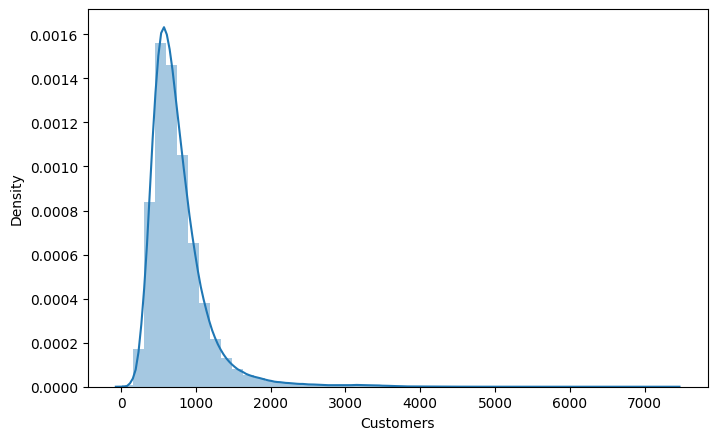

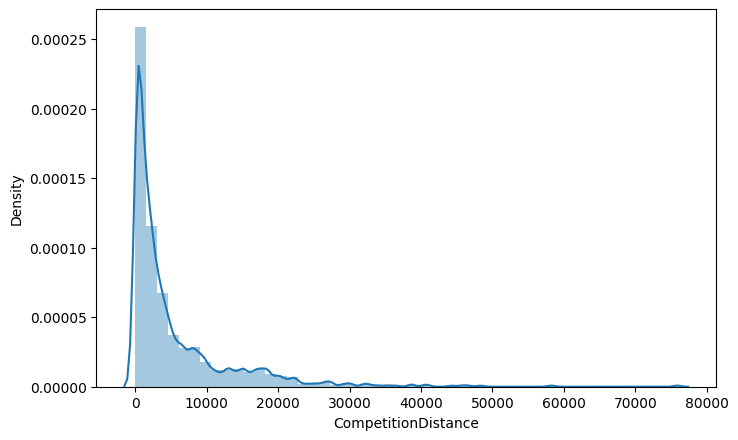

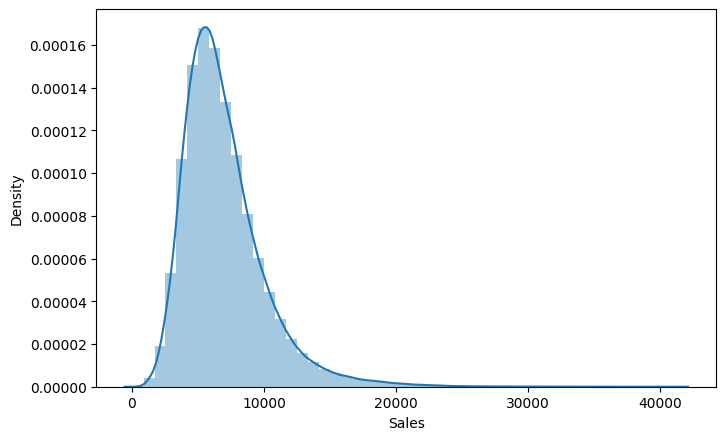

In [106]:
# checking the distribution for the columns which are continuous 
continuous_variable_list = ["Customers","CompetitionDistance","Sales"]
for i in continuous_variable_list:
  sns.distplot(df_merged[i])
  plt.show()

We can observe from the above distribution that all three of them are right skewed So we need to apply transformations to get the distributions that is appropriate for the modelling.

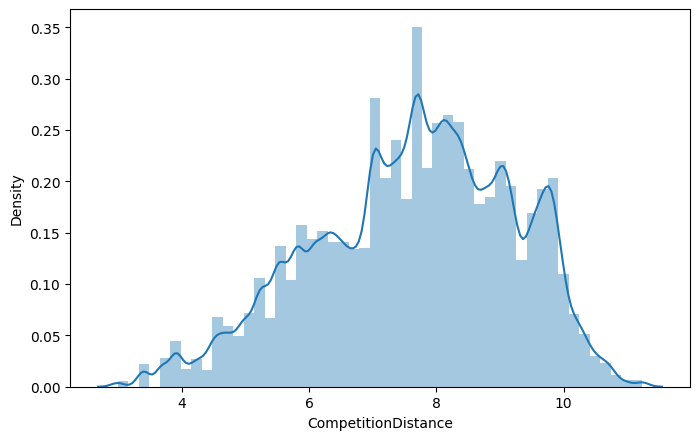

In [107]:
# checking log transformation for CompetitionDistance 
sns.distplot(np.log(df_merged["CompetitionDistance"]))

Now the distribution looks better than earlier.

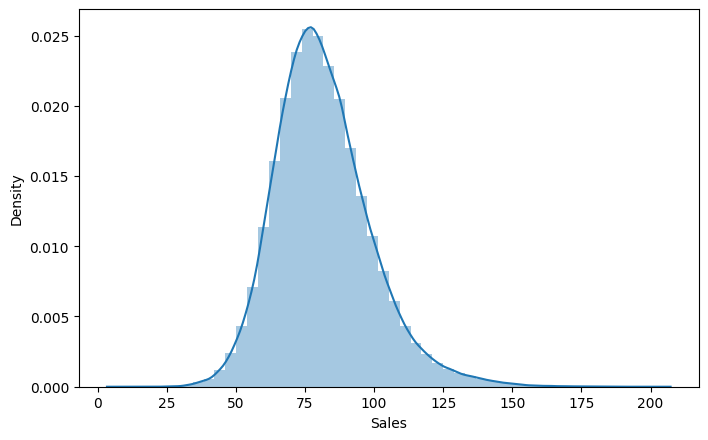

In [108]:
# checking the sqrt distribution of of Sales
sns.distplot(np.sqrt(df_merged["Sales"]))


Seems like perfectly normally distributed appropriate for modelling.

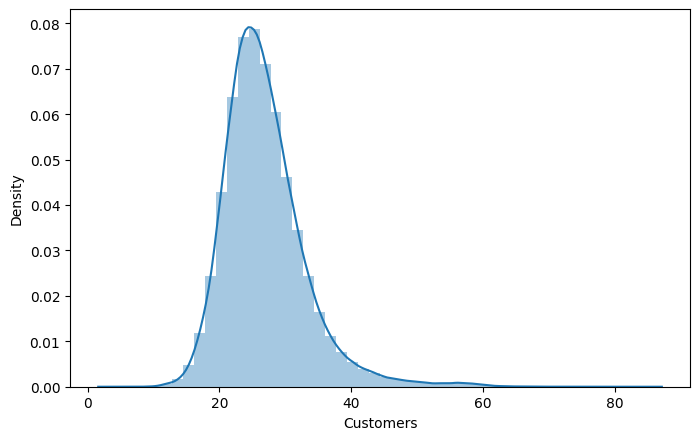

In [109]:
# checking the sqrt distribution of of Sales
sns.distplot(np.sqrt(df_merged["Customers"]))

Seems like perfectly normally distributed appropriate for modelling.

In [110]:
# adding new columns in the dataset after the required transformation
df_merged["log_CompetitionDistance"] = np.log(df_merged["CompetitionDistance"])
df_merged["sqrt_Sales"] = np.sqrt(df_merged["Sales"])
df_merged["sqrt_customers"] = np.sqrt(df_merged["Customers"])

In [111]:
categorical_variable_list = ['DayOfWeek','Promo','StateHoliday','SchoolHoliday','StoreType',
                             'Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2',
                             'Promo2SinceWeek','Promo2SinceYear','PromoInterval']

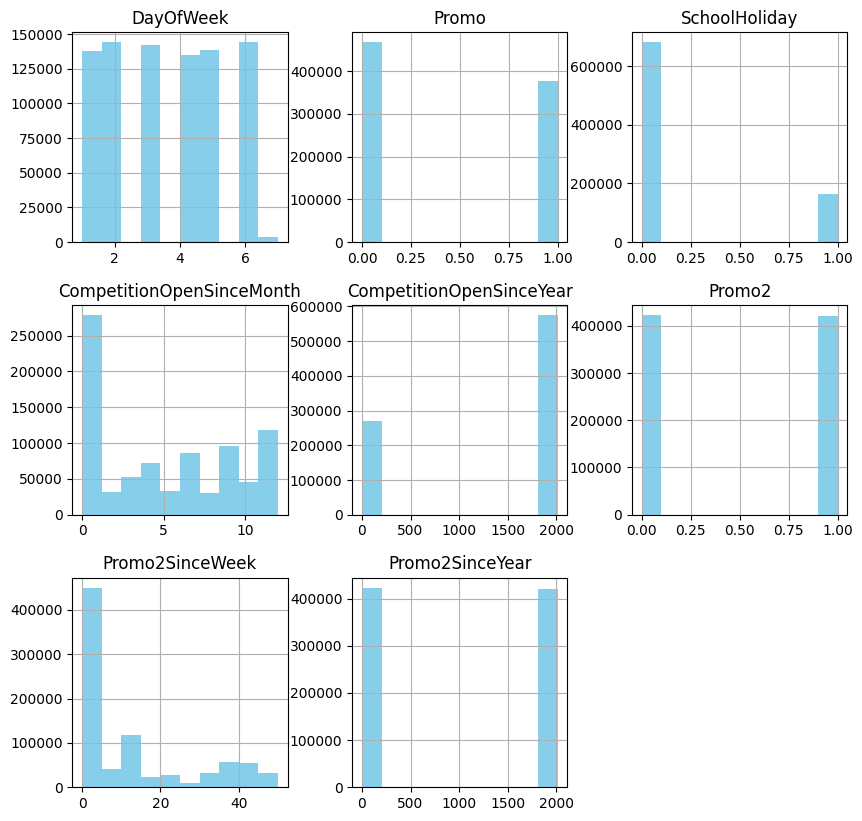

In [112]:
# Univariate analysis of Categorical Variables in the dataset using Histograms
df_merged[categorical_variable_list].hist(color = 'skyblue', figsize= (10,10) )
plt.show()


# **Bivariate Analysis**

**Customer vs Sales**

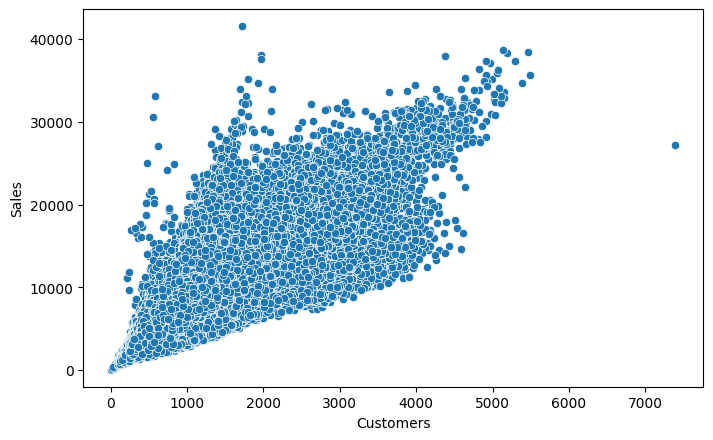

In [113]:
# scatterplot for customers vs sales
sns.scatterplot(x=df_merged['Customers'], y=df_merged['Sales'])

Since we have applied sqrt transformations in Sales and Customers we have to check the scatterplot again.

**Sqrt_Sales vs Sqrt_Customers**

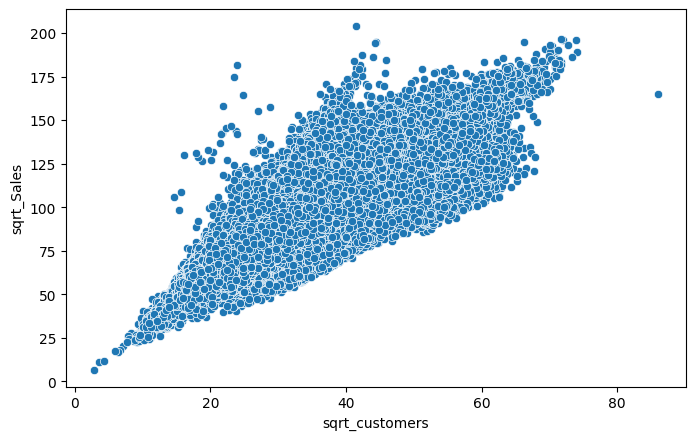

In [114]:
# scatterplot for sqrt_customers vs sqrt_sales
sns.scatterplot(x=df_merged['sqrt_customers'], y=df_merged['sqrt_Sales'])

**Observation**:
sqrt_Sales and sqrt_Customer scatter plot shows a direct positive relation between them with a few outliers

**Sales vs Log_competitionDistance**

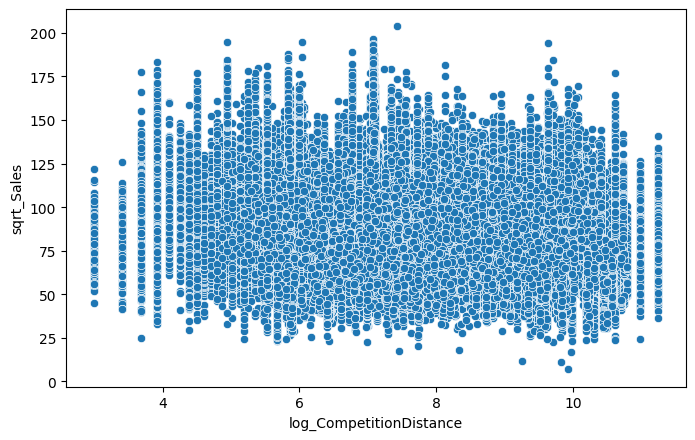

In [115]:
# scatterplot for log_CompetitionDistance vs sales
sns.scatterplot(x=df_merged['log_CompetitionDistance'], y=df_merged['sqrt_Sales'])


**Observation**:
From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

**Monthly Sales**  

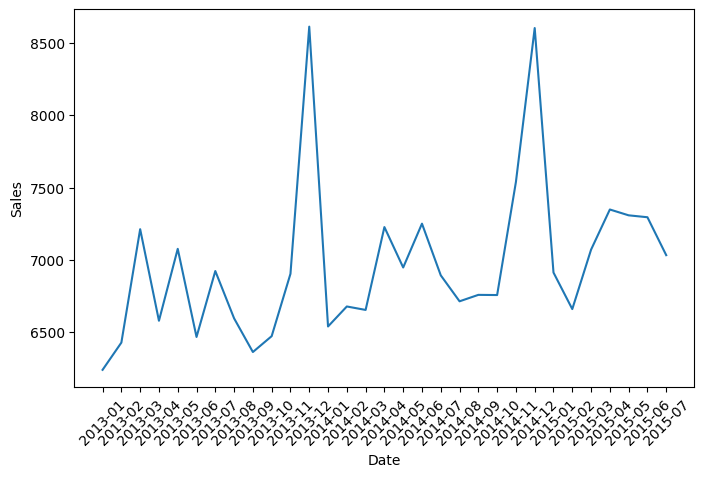

In [116]:
# plotting lineplot for monthly sales
sns.lineplot(data=df_merged.groupby('Date')['Sales'].mean().reset_index(), x='Date', y='Sales')
plt.xticks(rotation= 45)
plt.show()

**Observation**: Clearly evident that octorber 2013 and october 2014 has the maximum sales. That means october is the best month in terms of sales.

In [117]:
# adding a new column in dataframe for average sales 
df_merged["Avg_Customer_Sales"] = df_merged.Sales / df_merged.Customers

**Sales vs Storetypes and Sales vs Assortment**

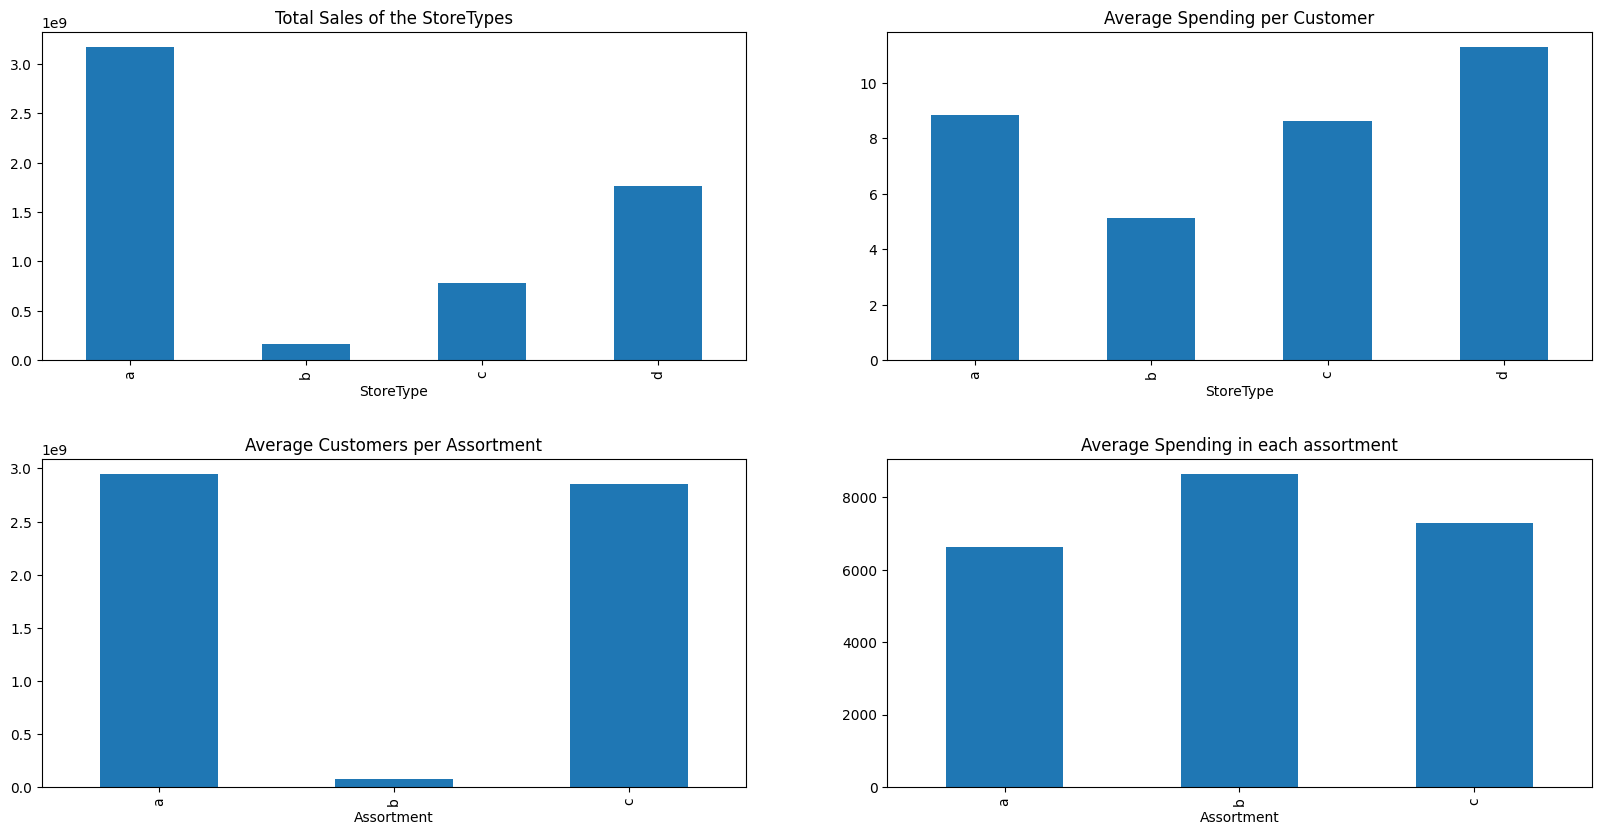

In [118]:
#plotting subplots showing Total Sales of Store Types, Average Spending per Customer, Average Customer per Store Type and Average sales of Store Types using the mentioned formulae

f, ax = plt.subplots(2, 2, figsize = (20,10))

df_merged.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,0], title = "Total Sales of the StoreTypes")
df_merged.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[0,1], title = "Average Spending per Customer")
df_merged.groupby("Assortment")["Sales"].sum().plot(kind = "bar", ax = ax[1,0], title = "Average Customers per Assortment")
df_merged.groupby("Assortment")["Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending in each assortment")

plt.subplots_adjust(hspace = 0.3)
plt.show()

**Observation**:

*   Store a has maximum customers 
*   Store d has maximum avg spendings per customers.

*   Assortment a and c has maximum customers
*   In terms of avg spending per customers assortment b has maximum footfalls.





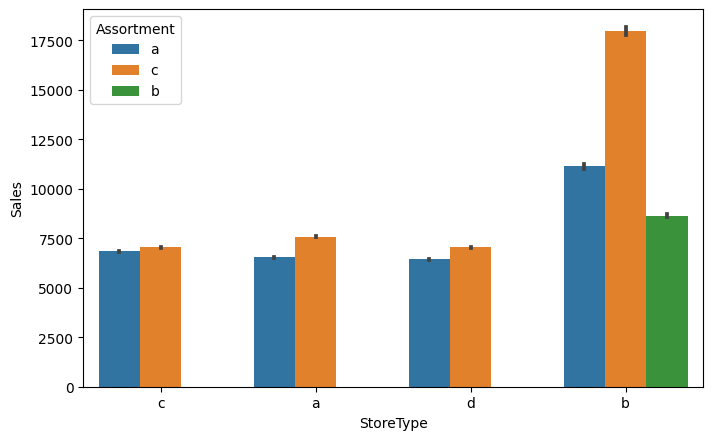

In [119]:
# subplots to show grouping of assortments under storetypes
sns.barplot(x=df_merged["StoreType"],y=df_merged['Sales'],hue=df_merged["Assortment"])

**Observation**:
The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores

**Sales vs DayofWeek (with or without promo)**

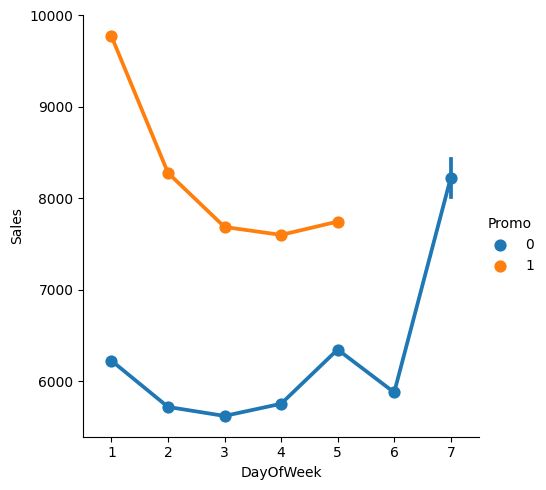

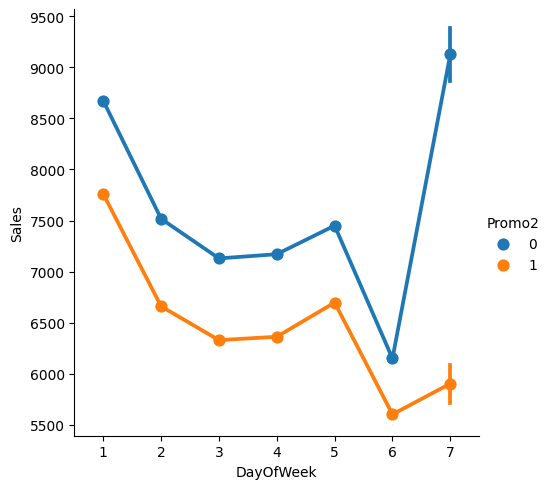

In [120]:
# factorplots for promo and promo2 
sns.factorplot(data = df_merged, x = "DayOfWeek", y = "Sales", hue = "Promo")
sns.factorplot(data = df_merged, x = "DayOfWeek", y = "Sales", hue = "Promo2")

**Observation**: So, no promotion in the weekend. However, the sales are very high. If promo offers are to be given on weekends definately the sales are going to skyrocket.

**State Holiday vs Average sales**

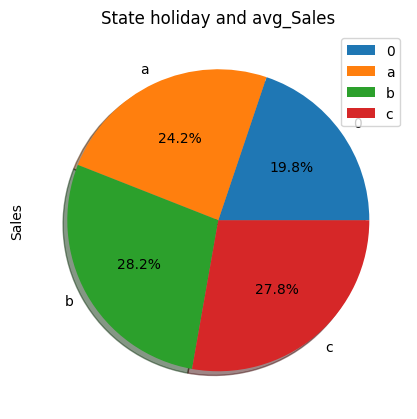

In [121]:
# pie chart to show State holiday vs avg_Sales
df_merged.groupby("StateHoliday")["Sales"].mean().plot.pie(title='State holiday and avg_Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

**Schoolholiday vs Average sales**

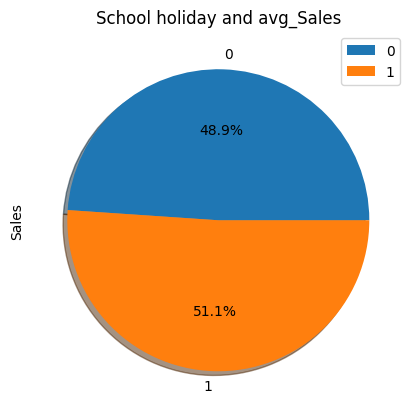

In [122]:
# pie chart to show average sales vs state holiday
df_merged.groupby("SchoolHoliday")["Sales"].mean().plot.pie(title='School holiday and avg_Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

**Observation**: Clearly evident that on holiday avg sales are better as compared to non holiday.

**Sales vs ComptetitionOpenSinceYear**

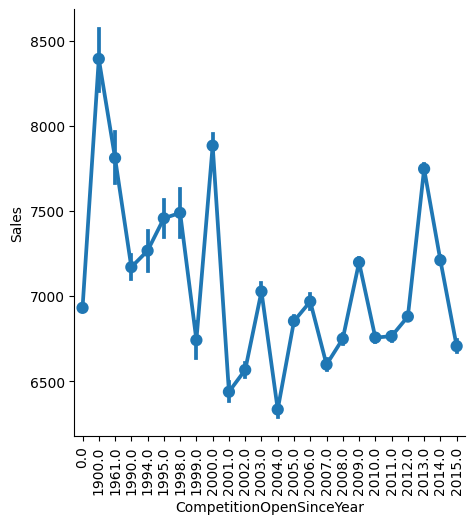

In [123]:
# catplot to show the trend
sns.catplot(data=df_merged, x="CompetitionOpenSinceYear", y="Sales", kind="point")
plt.xticks(rotation= 90)
plt.show()

# **Feature Engineering**

In [124]:
# mapping holiday with 1 and non holiday with 0 
df_merged["StateHoliday"] = df_merged["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

Since any kind of holiday can be a good ocassion for customers to go shopping . 
Assumption :-- Sales may not indevidually depend on the specific type of holiday. 

In [125]:
df_merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,log_CompetitionDistance,sqrt_Sales,sqrt_customers,Avg_Customer_Sales
0,1,5,2015-07,5263,555,1,0,1,c,a,...,0,0.0,0.0,0,2015,7,7.146772,72.546537,23.558438,9.482883
1,2,5,2015-07,6064,625,1,0,1,a,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,6.345636,77.871689,25.000000,9.702400
2,3,5,2015-07,8314,821,1,0,1,a,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,9.556055,91.181138,28.653098,10.126675
3,4,5,2015-07,13995,1498,1,0,1,c,c,...,0,0.0,0.0,0,2015,7,6.429719,118.300465,38.704005,9.342457
4,5,5,2015-07,4822,559,1,0,1,a,a,...,0,0.0,0.0,0,2015,7,10.305948,69.440622,23.643181,8.626118


**Checking and Treating Multicollinearity**

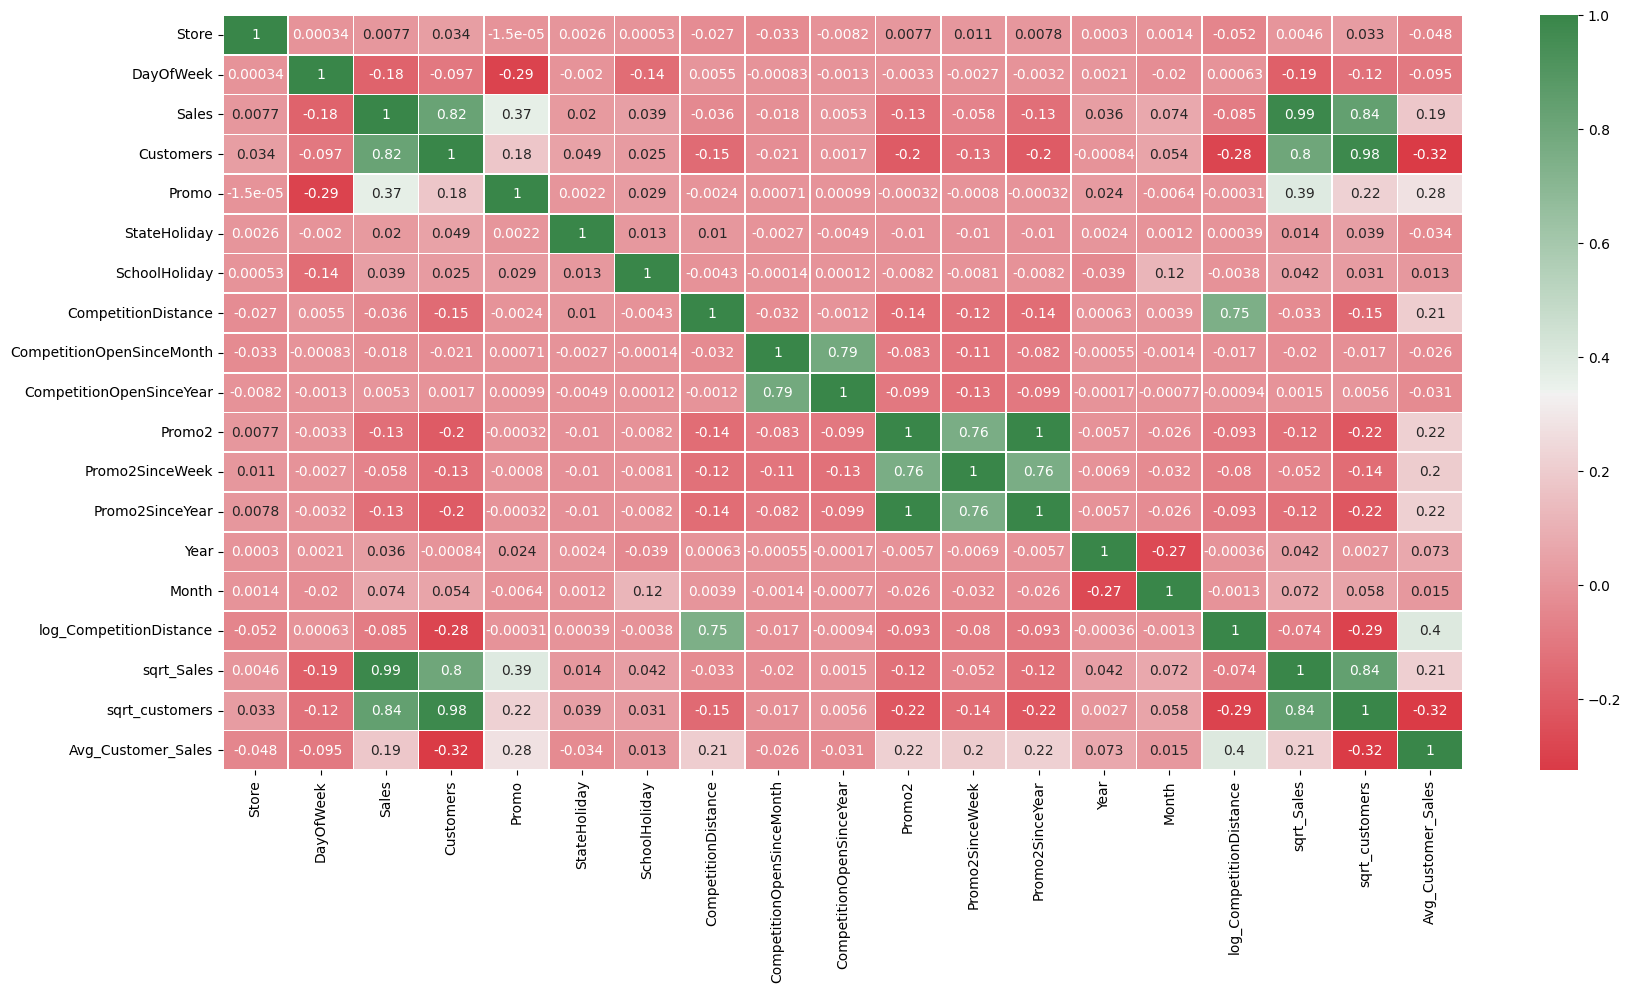

In [126]:
# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df_merged.corr(),ax = ax, annot=True, cmap=sns.diverging_palette(10, 133, as_cmap=True), linewidths=0.5)

Observations from the matrix:

*  Promo2 is highly correlated with promo2sinceYear and promo2sinceWeek




In [127]:
df_merged.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,log_CompetitionDistance,sqrt_Sales,sqrt_customers,Avg_Customer_Sales
0,1,5,2015-07,5263,555,1,0,1,c,a,...,0,0.0,0.0,0,2015,7,7.146772,72.546537,23.558438,9.482883


**VIF**

*   Let us verify multicollinearity by applying VIF algorithm.






In [128]:
# importing relevent library 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [129]:
# Calculating VIF for all the columns
calc_vif(df_merged[[i for i in df_merged.describe().columns if i not in ['Store','Sales','sqrt_Sales']]])

,variables,VIF
0,DayOfWeek,5.812915e+00
1,Customers,1.192030e+02
2,Promo,2.413165e+00
3,StateHoliday,1.006882e+00
4,SchoolHoliday,1.282828e+00
5,CompetitionDistance,3.530950e+00
6,CompetitionOpenSinceMonth,6.097367e+00
7,CompetitionOpenSinceYear,8.250351e+00
8,Promo2,1.580601e+06
9,Promo2SinceWeek,4.005173e+00


In [131]:
# one hot encoding for categorical features required for modelling
df_merged = pd.get_dummies(df_merged,columns=['StoreType','Assortment','Year',"DayOfWeek"])

In [132]:
df_merged.columns

Index(['Store', 'Date', 'Sales', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Month', 'log_CompetitionDistance',
       'sqrt_Sales', 'sqrt_customers', 'Avg_Customer_Sales', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c', 'Year_2013', 'Year_2014', 'Year_2015',
       'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7'],
      dtype='object')

# **Linear Regression(OLS)**

In [166]:
# importing library for statsmodel summary
import statsmodels.api as sm

In [167]:
# Determing independent and dependent variable best suited for modelling 
y = df_merged["sqrt_Sales"]
x1 = df_merged[['DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7','log_CompetitionDistance','sqrt_customers','StateHoliday', 'SchoolHoliday','Promo','Promo2','StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d','Assortment_a', 'Assortment_b',
       'Assortment_c', 'Year_2013', 'Year_2014', 'Year_2015','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']]

In [168]:
# fitting models as per statsmodel and getting the summary
x=sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqrt_Sales   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                 2.602e+05
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:21:15   Log-Likelihood:            -2.7639e+06
No. Observations:              844338   AIC:                         5.528e+06
Df Residuals:                  844316   BIC:                         5.528e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -9.1689      0.035   -263.969      0.000      -9.237      -9.101
DayOfWeek_1                   0.1448      0.023      6.293      0.000       0.100       0.190
DayOfWeek_2                  -1.7804      0.022    -79.622      0.000      -1.824      -1.737
DayOfWeek_3                  -2.3949      0.022   -107.410      0.000      -2.439      -2.351
DayOfWeek_4                  -2.9218      0.023   -129.080      0.000      -2.966      -2.877
DayOfWeek_5                  -2.1976      0.023    -97.381      0.000      -2.242      -2.153
DayOfWeek_6                   0.0749      0.023      3.284      0.001       0.030       0.120
DayOfWeek_7                  -0.0939      0.097     -0.968      0.333      -0.284       0.096
log_CompetitionDistance       1.5880      0.005    322.071      0.000       1.578       1.598
sqrt_customers                2.7233      0.001   1986.233      0.000       2.721       2.726
StateHoliday                  1.2492      0.214      5.846      0.000       0.830       1.668
SchoolHoliday                 0.7705      0.018     42.728      0.000       0.735       0.806
Promo                         6.6723      0.016    422.778      0.000       6.641       6.703
Promo2                        2.7297      0.015    186.595      0.000       2.701       2.758
StoreType_a                  -0.2308      0.023    -10.063      0.000      -0.276      -0.186
StoreType_b                 -14.2454      0.061   -233.680      0.000     -14.365     -14.126
StoreType_c                  -1.2227      0.026    -46.820      0.000      -1.274      -1.172
StoreType_d                   6.5300      0.025    258.485      0.000       6.481       6.580
Assortment_a                  3.4531      0.033    105.388      0.000       3.389       3.517
Assortment_b                -17.4402      0.073   -238.296      0.000     -17.584     -17.297
Assortment_c                  4.8182      0.034    141.595      0.000       4.751       4.885
Year_2013                    -3.8237      0.015   -256.504      0.000      -3.853      -3.794
Year_2014                    -3.2622      0.015   -215.524      0.000      -3.292      -3.233
Year_2015                    -2.0830      0.016   -129.538      0.000      -2.114      -2.051
CompetitionOpenSinceMonth    -0.0274      0.003    -10.429      0.000      -0.033      -0.022
CompetitionOpenSinceYear      0.0003   1.21e-05     22.365      0.000       0.000       0.000
==============================================================================
Omnibus:                    47431.319   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117504.279
Skew:                           0.337   Prob(JB):                         0.00
Kurtosis:                       4.699   C

We can see that R2 score is 0.862, which is close to 1 that means model is giving good results.

**lets apply linear regression using scikitlearn**

In [169]:
# Test Train split
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.3, random_state=1)

In [170]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.transform(x_test)

In [171]:
from sklearn.linear_model import LinearRegression
lin= LinearRegression()
linreg = lin.fit(x_train1, y_train)

In [172]:
# definte RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  
  
# get cross validation scores 
y_predicted = linreg.predict(x_train1)
y_test_predicted = linreg.predict(x_test1)

print("Regresion Model Score" , ":" , linreg.score(x_train1, y_train) , "\n" ,
      "Out of Sample Test Score" ,":" , linreg.score(x_test1, y_test))
print("\n")
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "\nTesting RMSE", ":", rmse(y_test, y_test_predicted))
print("\n")
print("Training MAPE", ":", mape(y_train, y_predicted),
      "\nTesting MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.8664652078843819 
 Out of Sample Test Score : 0.8653765767703856


Training RMSE : 6.385047934947499 
Testing RMSE : 6.396890687830893


Training MAPE : 6.203861698916588 
Testing MAPE : 6.22315646629609


In [176]:
prediction_df1 = pd.DataFrame(np.array((y_test)**2), columns = ["y_test"])
prediction_df1["y_test_predicted"] = np.array((y_test_predicted**2))
prediction_df1.head(5)

,y_test,y_test_predicted
0,4116.0,3940.625818
1,2277.0,2619.213463
2,8336.0,5761.201346
3,10274.0,9950.645007
4,4294.0,5147.196150


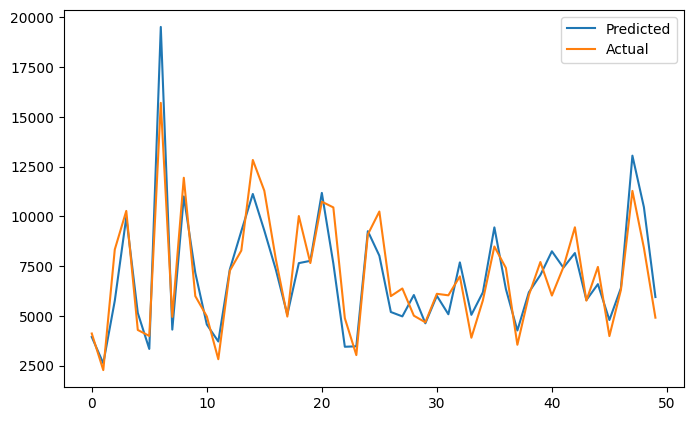

In [177]:
# plotting actual and predicted value as per best modal (Linear Regression)
plt.figure(figsize=(8,5))
plt.plot((y_test_predicted[:50])**2)
plt.plot(np.array((y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

# **LASSO-LARS Regression**

**Hyperparameter Tuning using GridsearchCV**

In [188]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\n\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)


y_predicted = lasso_regressor.predict(x_train)
y_test_predicted = lasso_regressor.predict(x_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "\nTesting RMSE", ":", rmse(y_test, y_test_predicted))
print("\n")
print("Training MAPE", ":", mape(y_train, y_predicted),
      "\nTesting MAPE", ":", mape(y_test, y_test_predicted))

The best fit alpha value is found out to be : {'alpha': 1e-15}


Using  {'alpha': 1e-15}  the negative mean squared error is:  -40.77271773031326
Training RMSE : 6.385023628877642 
Testing RMSE : 6.3968574838490895


Training MAPE : 6.204395736006064 
Testing MAPE : 6.223662707326786


In [178]:
from sklearn.linear_model import LassoLars
las = LassoLars(alpha=1e-15, fit_intercept=False, normalize=True)
lasreg = las.fit(x_train, y_train)
print("Regresion Model Score" , ":" , lasreg.score(x_train, y_train) , "\n" ,
      "Out of Sample Test Score" ,":" , lasreg.score(x_test, y_test))
print("\n")
yd_predicted = lasreg.predict(x_train)
yd_test_predicted = lasreg.predict(x_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "\nTesting RMSE", ":", rmse(y_test, y_test_predicted))
print("\n")
print("Training MAPE", ":", mape(y_train, y_predicted),
      "\nTesting MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.8664662245407455 
 Out of Sample Test Score : 0.8653779743312677


Training RMSE : 6.385047934947499 
Testing RMSE : 6.396890687830893


Training MAPE : 6.203861698916588 
Testing MAPE : 6.22315646629609


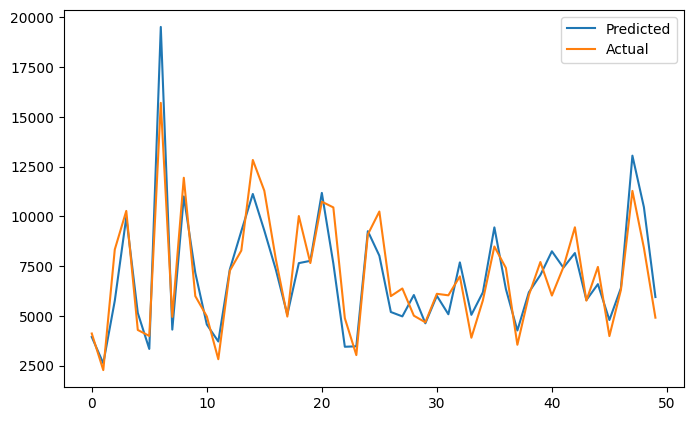

In [179]:
# plotting actual and predicted value as per best modal (Lasso)
plt.figure(figsize=(8,5))
plt.plot((y_test_predicted[:50])**2)
plt.plot(np.array((y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

# **Ridge Regression**

In [180]:
from sklearn.linear_model import BayesianRidge
rdg = BayesianRidge()
rdgreg = rdg.fit(x_train, y_train)

# validation
print("Regresion Model Score" , ":" , rdgreg.score(x_train, y_train) , "\n" ,
      "Out of Sample Test Score" ,":" , rdgreg.score(x_test, y_test))
print('\n')
yd_predicted = rdgreg.predict(x_train)
yd_test_predicted = rdgreg.predict(x_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "\nTesting RMSE", ":", rmse(y_test, y_test_predicted))
print("\n")
print("Training MAPE", ":", mape(y_train, y_predicted),
      "\nTesting MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.8664662239812616 
 Out of Sample Test Score : 0.8653780471261793


Training RMSE : 6.385047934947499 
Testing RMSE : 6.396890687830893


Training MAPE : 6.203861698916588 
Testing MAPE : 6.22315646629609


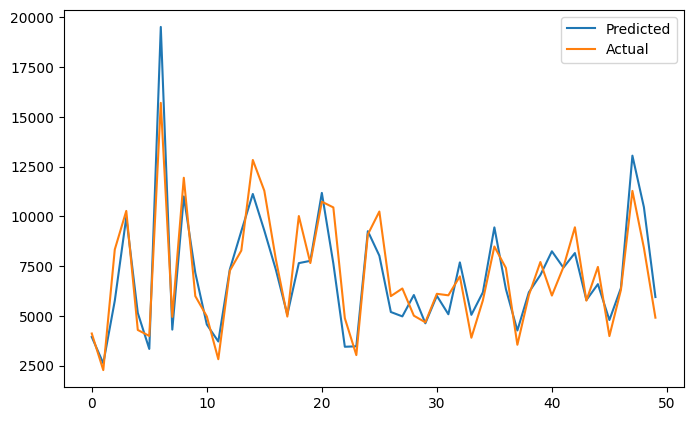

In [181]:
# plotting actual and predicted value as per best modal (Ridge)
plt.figure(figsize=(8,5))
plt.plot((y_test_predicted[:50])**2)
plt.plot(np.array((y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

# **Decision Tree**

In [182]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=20)
treereg = tree.fit(x_train, y_train)
print("Regresion Model Score" , ":" , treereg.score(x_train, y_train) , "\n" ,
      "Out of Sample Test Score" ,":" , treereg.score(x_test, y_test))
print("\n")
yl_predicted = treereg.predict(x_train)
yl_test_predicted = treereg.predict(x_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "\nTesting RMSE", ":", rmse(y_test, y_test_predicted))
print("\n")
print("Training MAPE", ":", mape(y_train, y_predicted),
      "\nTesting MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9625201729776389 
 Out of Sample Test Score : 0.9539323447167567


Training RMSE : 6.385047934947499 
Testing RMSE : 6.396890687830893


Training MAPE : 6.203861698916588 
Testing MAPE : 6.22315646629609


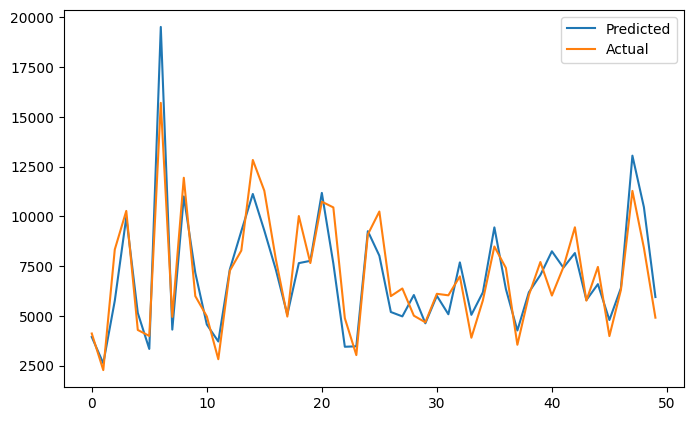

In [183]:
# plotting actual and predicted value as per best modal (Decision Tree)
plt.figure(figsize=(8,5))
plt.plot((y_test_predicted[:50])**2)
plt.plot(np.array((y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

# **Random Forest**

In [184]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=30)
rdfreg = rdf.fit(x_train, y_train)
print("Regresion Model Score" , ":" , rdfreg.score(x_train, y_train) , "\n" ,
      "Out of Sample Test Score" ,":" , rdfreg.score(x_test, y_test))   
print("\n")
y_predicted = rdfreg.predict(x_train)
y_test_predicted = rdfreg.predict(x_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "\nTesting RMSE", ":", rmse(y_test, y_test_predicted))
print("\n")
print("Training MAPE", ":", mape(y_train, y_predicted),
      "\nTesting MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9953339780361862 
 Out of Sample Test Score : 0.971399595456645


Training RMSE : 1.1935492221419886 
Testing RMSE : 2.9484563494899674


Training MAPE : 1.0482473430013561 
Testing MAPE : 2.6654025768784817


**Feature importance as per Random Forest** 

Text(0.5, 0, 'Relative Importance')

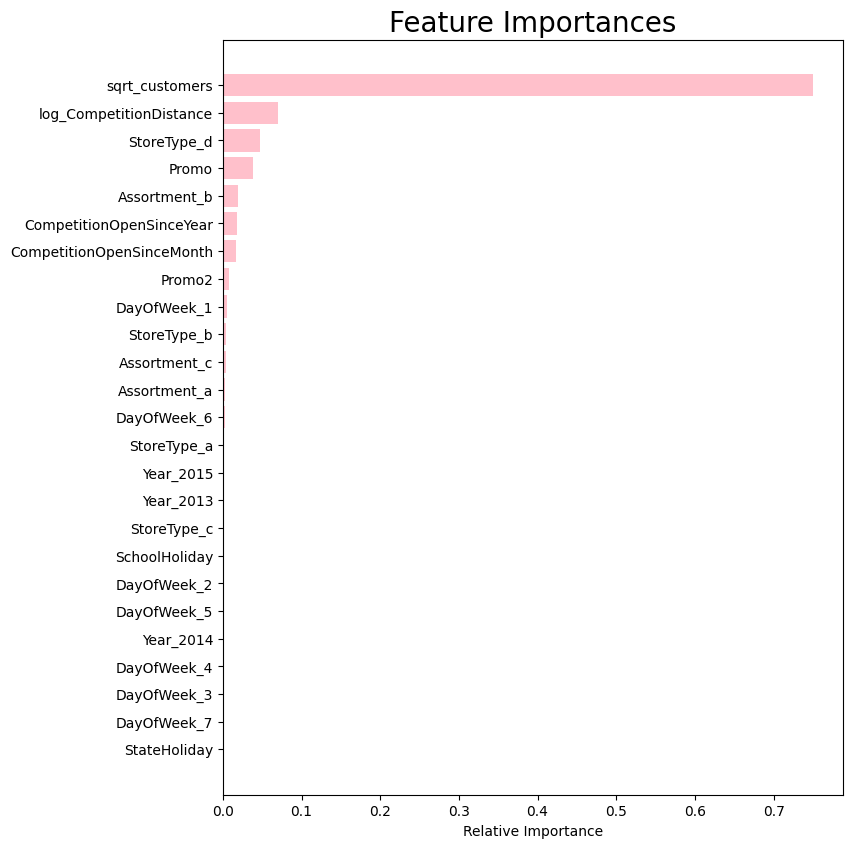

In [185]:
features = x_train.columns
importances = rdfreg.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# **Pridiction as per best model**

In [186]:
# constructing a dataframe with actual and predicted values (Prediction)
prediction_df = pd.DataFrame(np.array((y_test)**2), columns = ["y_test"])
prediction_df["y_test_predicted"] = np.array((y_test_predicted)**2)
prediction_df.head(20)

,y_test,y_test_predicted
0,4116.0,3831.554848
1,2277.0,2287.306194
2,8336.0,7904.836132
3,10274.0,9715.339656
4,4294.0,5096.988695
5,3993.0,3782.667101
6,15700.0,16105.948383
7,4951.0,5349.941542
8,11939.0,11943.839859
9,5994.0,6352.224121


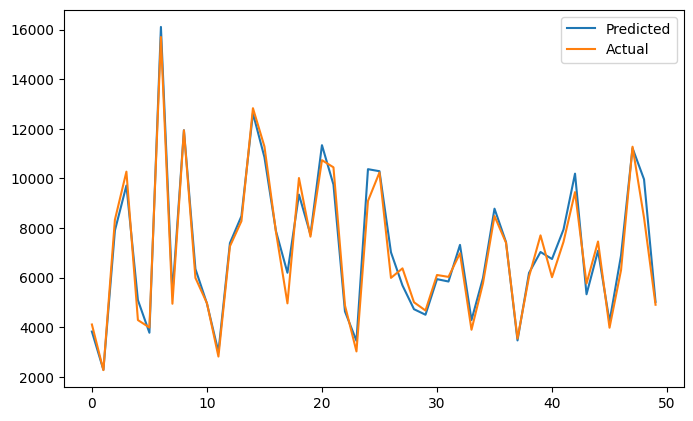

In [187]:
# plotting actual and predicted value as per best modal (Random Forest)
plt.figure(figsize=(8,5))
plt.plot((y_test_predicted[:50])**2)
plt.plot(np.array((y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

**Conclusion: With 99% Training Accuracy and 97% Testing Accuracy, Random Forest has proven to be the most efficient model out of the algorithms used in our model, including Linear Regression, Lasso Regression, Ridge Regression, Decision Tree, and Random Forest.**